<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-线性回归模型" data-toc-modified-id="1-线性回归模型-1">1 线性回归模型</a></span></li><li><span><a href="#2-计算图的两个主要概念是什么?" data-toc-modified-id="2-计算图的两个主要概念是什么?-2">2 计算图的两个主要概念是什么?</a></span></li><li><span><a href="#3-动态图与静态图的区别是什么？" data-toc-modified-id="3-动态图与静态图的区别是什么？-3">3 动态图与静态图的区别是什么？</a></span></li></ul></div>

### 1 线性回归模型
调整线性回归模型停止条件以及y = 2*x + (5 + torch.randn(20, 1))中的斜率，训练一个线性回归模型

[Visualizing gradient descent in action](https://nbviewer.jupyter.org/gist/joshfp/85d96f07aaa5f4d2c9eb47956ccdcc88/lesson2-sgd-in-action.ipynb)  

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

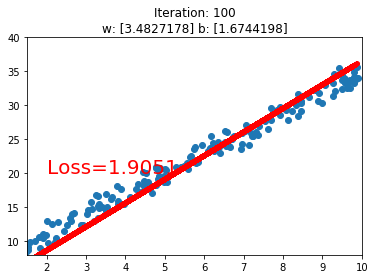

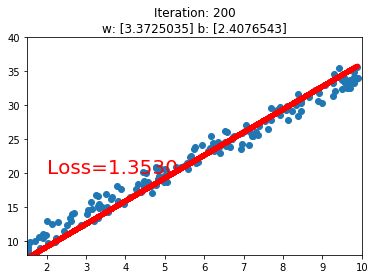

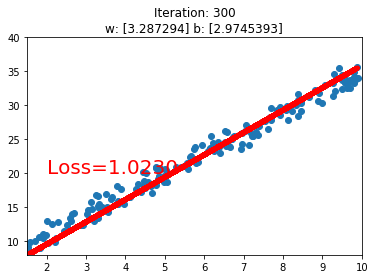

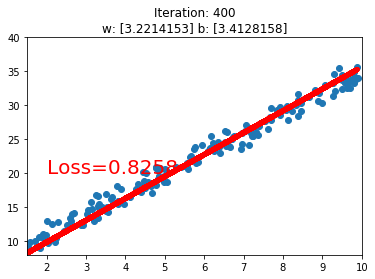

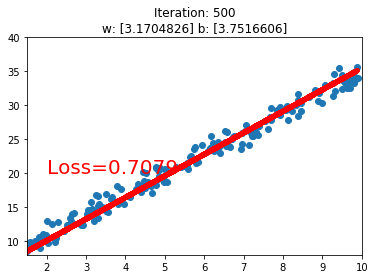

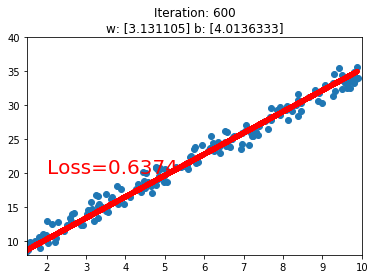

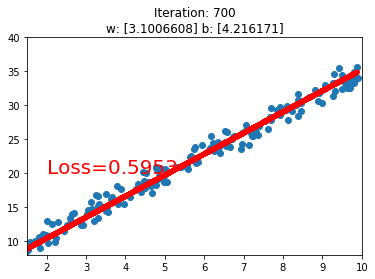

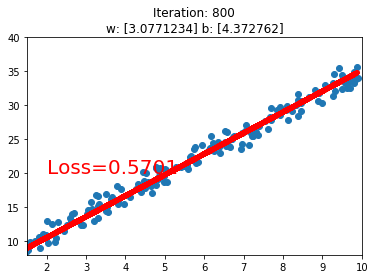

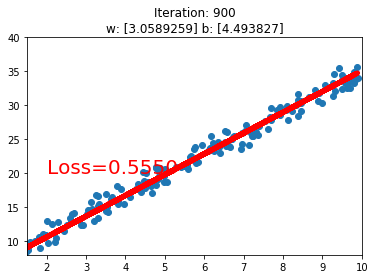

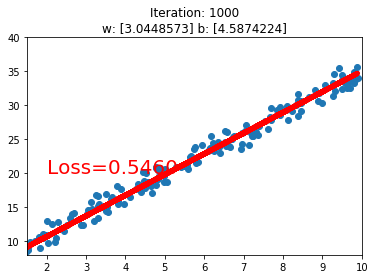

In [14]:
# -*- coding:utf-8 -*-
"""
@file name  : lesson-03-Linear-Regression.py
@author     : tingsongyu
@date       : 2018-08-26
@brief      : 一元线性回归模型
"""
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.01  # 学习率
best_loss = float("inf")

# 创建训练数据
x = torch.rand(200, 1) * 10  # x data (tensor), shape=(20, 1)
y = 3*x + (5 + torch.randn(200, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(10000):

    # 前向传播
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()


    
    current_loss = loss.item()
    if current_loss < best_loss:
        best_loss = current_loss
        best_w = w
        best_b = b
        
    # 绘图
    if iteration%100 == 0:
        if loss.data.numpy() < 3:
            plt.scatter(x.data.numpy(), y.data.numpy())
            plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
            plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
            plt.xlim(1.5, 10)
            plt.ylim(8, 40)
            plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
            plt.pause(0.5)

            if loss.data.numpy() < 0.55:
                break
            
    # 更新参数
    w.data.sub_(lr * w.grad)
    b.data.sub_(lr * b.grad) 
    
    # 梯度清零
    w.grad.zero_()
    b.grad.zero_()

In [15]:
best_loss, best_w, best_b

(0.5460291504859924,
 tensor([3.0449], requires_grad=True),
 tensor([4.5874], requires_grad=True))

### 2 计算图的两个主要概念是什么?

计算图是用来描述运算的有向无环图

计算图有两个主要元素：结点(Node)和边(Edge)

结点表示数据，如向量，矩阵，张量
边表示运算，如加减乘除卷积等

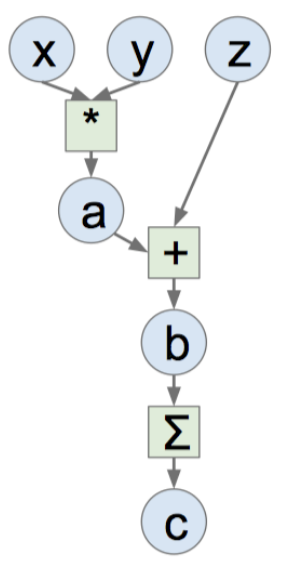

### 3 动态图与静态图的区别是什么？

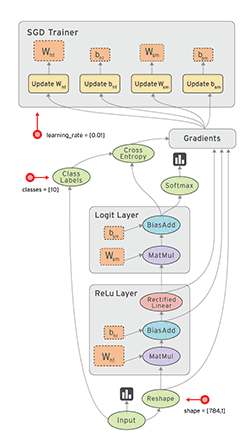

Pytorch 是动态图，每一次训练，都会销毁图并重新创建，这样做花销很大，但是更加灵活。 

而 Tensorflow 是静态图，一旦定义训练时就不能修改。